# Testing and examples for aslmcg function

The function `aslmcg` computes adjoint spheroidals usiung a spherical harmonic expansion.

In [1]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
# Setup plotting backend
from matplotlib.pyplot import *
from numpy import *
from positive import *

(positive)>> Applying custom matplotlib settings.


In [2]:
?aslmcg

Signature: aslmcg(a, s, l, m, n, theta, phi, kerr=True, lmin=None, lmax=None, span=6, force_norm=True)
Docstring:
Compute adjoint spheroidal harmonic functoin using the spherical harmonic clensch-gordan method. By default, kerr adjoint functions are computed.
londonl@mit.edu 2020
File:      ~/JOKI/Libs/KOALA/positive_dev/positive/physics.py
Type:      function


In [3]:
a = 0.01
s,l,m,n = -2,2,2,0
theta = linspace(0,pi,int(2**9))[1:-1]
phi = 0

cw,A1 = leaver(a,l,m,n)
aw = a*cw

# Compute adjoint spheroidal using spheroidal expansion as a check
foo = slm_dual_set( a, l, m, n, theta, phi, s=s, lmax=8 )

In [4]:
bar = aslmcg( a, s, l, m, n, theta, phi, span=10 )

In [5]:
??prod

Signature: prod(A, B, TH, WEIGHT_FUNCTION=None, k=5)
Source:   
def prod(A,B,TH,WEIGHT_FUNCTION=None,k=5):
    from numpy import sin,pi
    if WEIGHT_FUNCTION is None:
        WEIGHT_FUNCTION = 2*pi*sin(TH)
    INTGRND = A.conj()*B*WEIGHT_FUNCTION
    RE_INTGRND = INTGRND.real
    IM_INTGRND = INTGRND.imag
    TH0,TH1 = lim(TH)
    return spline(TH,RE_INTGRND,k=k).integral(TH0,TH1) + 1j*spline(TH,IM_INTGRND,k=k).integral(TH0,TH1)
File:      ~/JOKI/Libs/KOALA/positive_dev/positive/physics.py
Type:      function


(notebook)>> (1+0j)
(notebook)>> (1+0j)


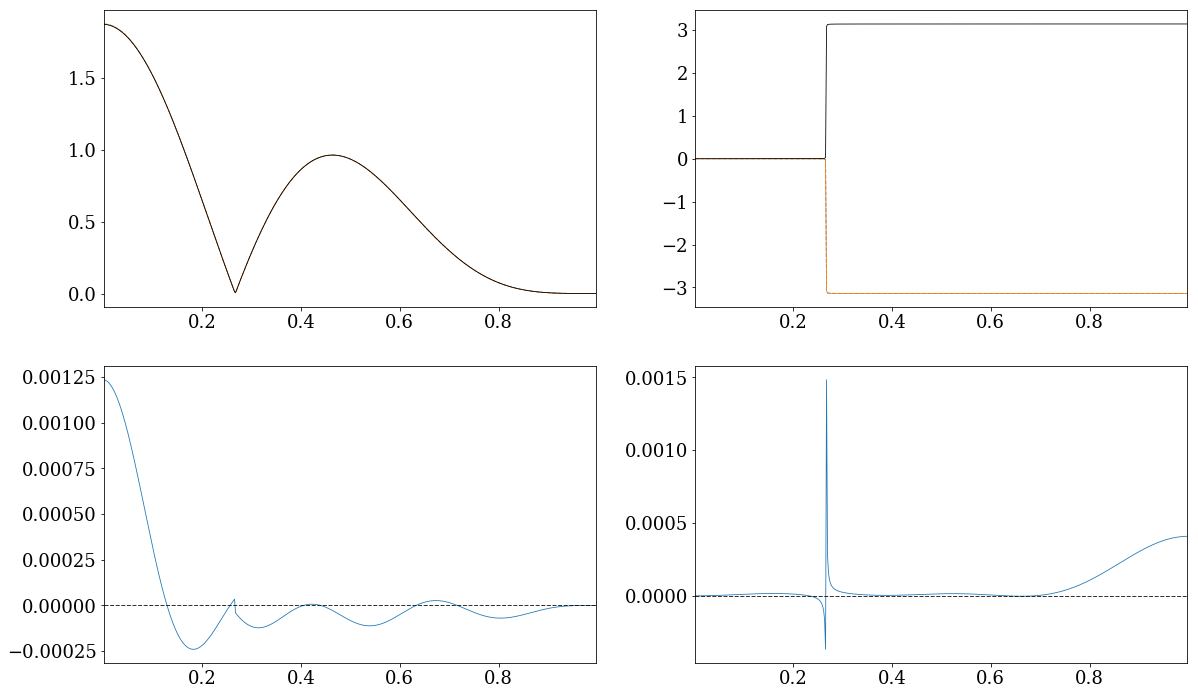

In [6]:

ll = l+1

S = bar['Slm'][ll]/sqrt(prod( bar['Slm'][ll], bar['Slm'][ll],theta,WEIGHT_FUNCTION=sin(theta)))
aS1 = foo['AdjSlm'][ ll ]/sqrt(prod(foo['AdjSlm'][ ll ],foo['AdjSlm'][ ll ],theta,WEIGHT_FUNCTION=sin(theta)))
aS2 = bar['AdjSlm'][ ll ]/sqrt(prod(bar['AdjSlm'][ ll ],bar['AdjSlm'][ ll ],theta,WEIGHT_FUNCTION=sin(theta)))
u = theta/pi
pha = lambda x: unwrap( angle(x) )-unwrap( angle(x) )[0]

fig = figure( figsize=3*figaspect(0.618) )

b = 1.0

alert( prod(b*aS2,b*aS2,theta,WEIGHT_FUNCTION=sin(theta)) )
alert( prod(b*aS1,b*aS1,theta,WEIGHT_FUNCTION=sin(theta)) )

subplot(2,2,1)
plot( u, b*abs(aS1),ls='--' )
plot( u, b*abs(aS2) )
plot( u, b*abs(S), color='k',ls='-' )
xlim( lim(u) )

subplot(2,2,2)
plot( u, pha(aS1),ls='--' )
plot( u, pha(aS2) )
plot( u, pha(S), color='k',ls='-' )
xlim( lim(u) );

subplot(2,2,3)
plot( u, b*(abs(aS1)-abs(aS2)) )
plot( u, b*abs(S)*0, color='k',ls='--' )
xlim( lim(u) )

subplot(2,2,4)
plot( u, pha(aS1)-pha(aS2) )
plot( u, pha(S)*0, color='k',ls='--' )
xlim( lim(u) );

In [7]:
print(bar.keys())
print(foo.keys())

['overtone_index', 'Yspace', 'lnspace', 'Slm', 'YSGramian', 'aSspace', 'ZAX', 'AdjSlm', 'Ylm', 'matrix_op']
['Sspace', 'lnspace', 'Slm', 'aSspace', 'SGramian', 'AdjSlm']


In [8]:
x = zeros_like(bar['YSGramian'])
for aa in range(len(bar['lnspace'])):
    for bb in range(len(bar['lnspace'])):
        S  = bar['Slm'][bar['lnspace'][aa]] 
        aS = bar['AdjSlm'][bar['lnspace'][bb]]
        x[aa,bb] = prod( S, aS, theta )

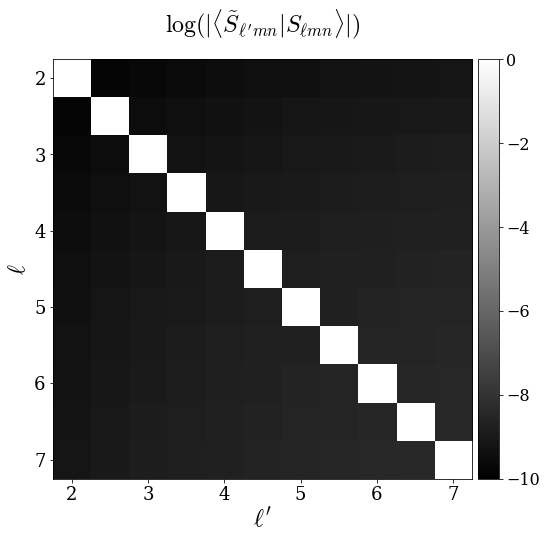

In [9]:
from matplotlib.pyplot import cm

def plotipmat(X,filepath,title_string=None,save=False,setclib=True,logscale=True,clm=None):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    fig = figure( figsize=2*figaspect(1) )
    ax = gca()
    if logscale:
        matshow(log(abs(X)),fignum=False,cmap=cm.gray)
    else:
        matshow((abs(X)),fignum=False,cmap=cm.gray)
    Z = log(abs(X))
    ax.xaxis.tick_bottom()
    ax.set_xticklabels( arange(0,X.shape[0]+1)+1 )
    ax.set_yticklabels( arange(0,X.shape[-1]+1)+1 )
    xlabel('$\ell\'$')
    ylabel('$\ell$')
    title(title_string)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.08)
    cb = colorbar(cax=cax)
    cb.ax.tick_params(labelsize=16)
    if not clm:
        c1,c2 = 0,-10 
    else:
        c1,c2 = clm
    if setclib:
        clim(c1,c2)
    if save: alert('Saving to: %s'%yellow(filepath))
    if save: savefig(filepath,pad_inches=0)
    return fig

#
filepath = '/Users/book/KOALA/spheroidal_imr/paper/biorthog_a%1.2f_m%i_aslmcg.pdf'%(a,m)
filepath = filepath.replace('0.','0p')
title_string = r"$ \log( | \langle \tilde{S}_{\ell' m n} | S_{\ell m n} \rangle | )$"
plotipmat(x,filepath,title_string,clm=(0,-10));

In [10]:
print(bar.keys())

['overtone_index', 'Yspace', 'lnspace', 'Slm', 'YSGramian', 'aSspace', 'ZAX', 'AdjSlm', 'Ylm', 'matrix_op']


(plotipmat)>> Saving to: /Users/book/KOALA/spheroidal_imr/paper1/Lddag_a0p01_m2_aslmcg.pdf


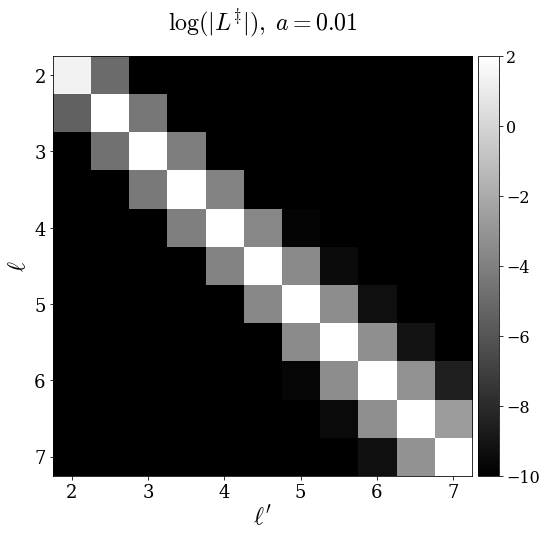

In [11]:
close('all')
filepath = '/Users/book/KOALA/spheroidal_imr/paper1/Lddag_a%1.2f_m%i_aslmcg.pdf'%(a,m)
filepath = filepath.replace('0.','0p')
plotipmat( bar['matrix_op'] ,filepath,r'$\log(|L^{\ddag}|),\;a=%1.2f$'%a,setclib=True,save=True,logscale=True,clm=(2,-10));

In [44]:
Ldd = bar['matrix_op']
vals,vecs = linalg.eig( Ldd )
Z,A,X = bar['ZAX']

In [38]:
print( vals)

[  -3.98999193+0.00237669j   -9.99197501+0.00124039j
  -17.99349199+0.00075875j  -27.99455527+0.00051316j
  -39.99531923+0.00037208j  -53.99588556+0.00028409j
  -69.99631639+0.00022586j  -87.99665058+0.00018558j
 -107.99691333+0.00015676j]


In [39]:
print( diag( A) ) 

[  -3.98999193-0.00237669j   -9.99197501-0.00124039j
  -17.99349199-0.00075875j  -27.99455527-0.00051316j
  -39.99531923-0.00037208j  -53.99588556-0.00028409j
  -69.99631639-0.00022586j  -87.99665058-0.00018558j
 -107.99691333-0.00015676j]


In [50]:
(0.7**8)/(factorial(8))

1.429762152777777e-06